In [48]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
%matplotlib inline

In [37]:
data = pd.read_csv('Heart.csv')
data = data.replace(to_replace='?',value=np.nan)
data = data.dropna()
data = np.array(data)

In [38]:
X = data[:,:13]
Y = data[:,13]
Y = Y.astype('int')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)

In [60]:
n_trees = np.arange(1,301,1)
bagging_e = np.zeros(len(n_trees))
bagging_oob = np.zeros(len(n_trees))
ranforest_e = np.zeros(len(n_trees))
ranforest_oob = np.zeros(len(n_trees))

for i in range(len(n_trees)):
    bagging = BaggingClassifier(n_estimators=n_trees[i], oob_score=True)
    
    bagging.fit(X_train,Y_train)
    pred = bagging.predict(X_test)
    bagging_e[i] = accuracy_score(Y_test,pred)
    bagging_oob[i] = bagging.oob_score_
    
for i in range(len(n_trees)):
    ranforest = RandomForestClassifier(n_estimators=n_trees[i], oob_score=True)
    
    ranforest.fit(X_train,Y_train)
    pred = ranforest.predict(X_test)
    ranforest_e[i] = accuracy_score(Y_test,pred)
    ranforest_oob[i] = ranforest.oob_score_

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few

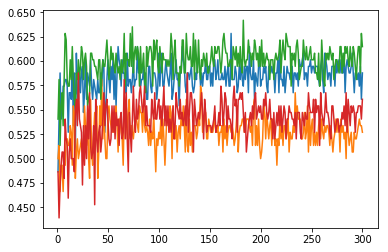

In [62]:
plt.plot(n_trees,bagging_e)
plt.plot(n_trees,bagging_oob)
plt.plot(n_trees,ranforest_e)
plt.plot(n_trees,ranforest_oob)

In [49]:
data2 = pd.read_csv('OJ.csv')
data2 = data2.dropna()
data2 = data2.drop('Store7', axis=1)
data2 = data2.replace(to_replace='CH',value=0.0)
data2 = data2.replace(to_replace='MM',value=1.0)

In [65]:
X2 = data2.drop('Purchase', axis=1)
Y2 = data2['Purchase']

X2 = np.array(X2)
Y2 = np.array(Y2)

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.5)

In [ ]:
n_trees = np.arange(1,301,1)
ranforest_e1 = np.zeros(len(n_trees))
ranforest_oob1 = np.zeros(len(n_trees))
ranforest_e2 = np.zeros(len(n_trees))
ranforest_oob2 = np.zeros(len(n_trees))
ranforest_e3 = np.zeros(len(n_trees))
ranforest_oob3 = np.zeros(len(n_trees))

for i in range(len(n_trees)):
    ranforest = RandomForestClassifier(n_estimators=n_trees[i], oob_score=True, max_features=17)
    
    ranforest.fit(X2_train,Y2_train)
    pred = ranforest.predict(X2_test)
    ranforest_e1[i] = accuracy_score(Y2_test,pred)
    ranforest_oob1[i] = ranforest.oob_score_
    
for i in range(len(n_trees)):
    ranforest = RandomForestClassifier(n_estimators=n_trees[i], oob_score=True, max_features=8)
    
    ranforest.fit(X2_train,Y2_train)
    pred = ranforest.predict(X2_test)
    ranforest_e2[i] = accuracy_score(Y2_test,pred)
    ranforest_oob2[i] = ranforest.oob_score_
    
for i in range(len(n_trees)):
    ranforest = RandomForestClassifier(n_estimators=n_trees[i], oob_score=True, max_features=4)
    
    ranforest.fit(X2_train,Y2_train)
    pred = ranforest.predict(X2_test)
    ranforest_e3[i] = accuracy_score(Y2_test,pred)
    ranforest_oob3[i] = ranforest.oob_score_

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees we

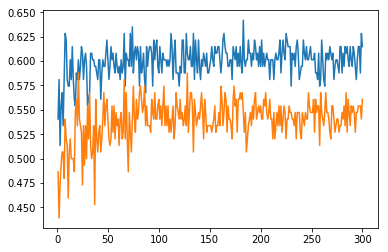

In [59]:
plt.plot(n_trees,ranforest_e1)
plt.plot(n_trees,ranforest_oob1)
plt.plot(n_trees,ranforest_e2)
plt.plot(n_trees,ranforest_oob2)
plt.plot(n_trees,ranforest_e3)
plt.plot(n_trees,ranforest_oob3)